# 项目简介
掌握使用nc文件绘图时出现的地图白边问题

## 本教程是该项目中涉及的basemap相关代码分享，cartopy代码请移步隔壁教程


配套视频链接：
https://www.bilibili.com/video/BV1kd4y1Q7fE

## 省流总结：
经度白边出现的原因：经度在0度附近不连续（0, 2.5, 5…357.5）

（1）cartopy经度中心（0度）白边问题
解决方法：调整中心经度+设置xticklabels → 正确对应经度

（2）basemap经度边缘白边问题
解决方法：调整Basemap区域，裁剪多余的经度
（如果是纬度白边同理，裁剪掉多余的即可）

（3）0度附近区域
解决方法参考：1）cartopy里面的add_cyclic_point函数可以直接把357.5 → 0看成连续的，来自@一阶魔方国家队成员 大佬；2）插值

*经测试，add_cyclic_point生成的新的lon里面有360，但xticks仍然没法取到360，可考虑取359.9并给它添加label为0度

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

In [3]:
#导入文件
filename = r'C:\Users\LULU\Desktop\air\air.mon.ltm.1991-2020.nc'
f = nc.Dataset(filename)

文件信息请参考cartopy代码，用的是同一个文件，这里不再重复

In [4]:
#提取变量
lat = f.variables['lat'][:]
lon = f.variables['lon'][:]
air = f.variables['air'][:,0,:,:]  #air(time, level, lat, lon)
air_mean = np.mean(air,axis=0)

#画图网格
X,Y = np.meshgrid(lon,lat)

## 测试1：叠加的等高线填色图contourf与Basemap底图不匹配的问题
解决方法：设置mm = Basemap()中的参数，控制Basemap范围（改进的代码在测试2）

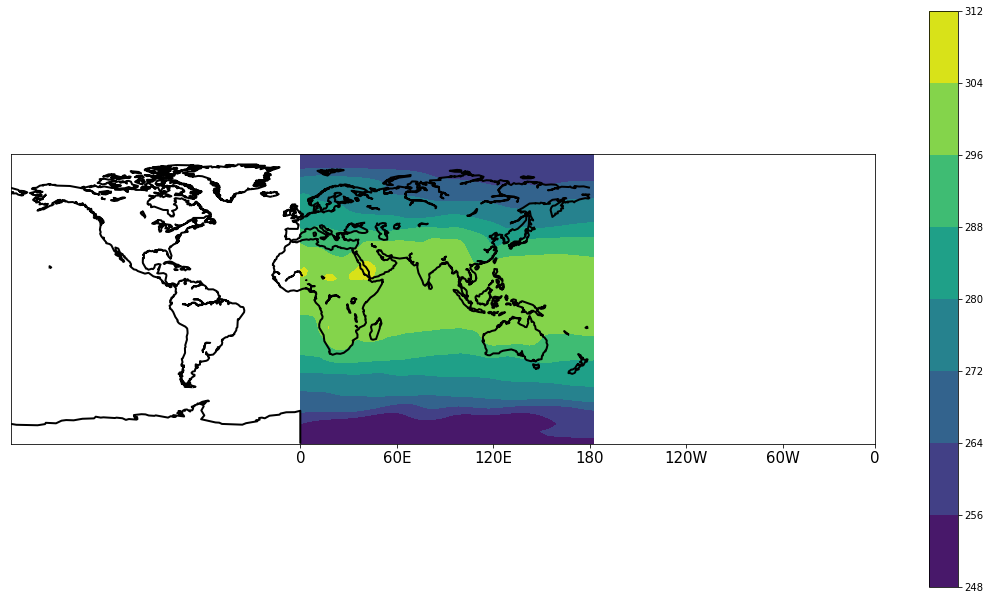

In [5]:
#画图
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0,0,1,1])

mm = Basemap()
mm.drawcoastlines(linewidth=2)  #绘制海岸线
con1 = mm.contourf(X,Y,air_mean)
ax1.set_xticks([0,60,120,180,240,300,357.])
ax1.set_xticklabels(['0','60E','120E','180','120W','60W','0'],fontsize=15)
fig.colorbar(con1)

## 测试2：经度边缘白边问题
解决方法：设置urcrnrlon=357.5（文件里面的经度最大值），控制Basemap范围（改进的代码在测试3）

注意：纬度边缘白边问题同理（某些nc文件的纬度最大值可能是89.5之类的数值），思路是控制Basemap范围裁剪白边

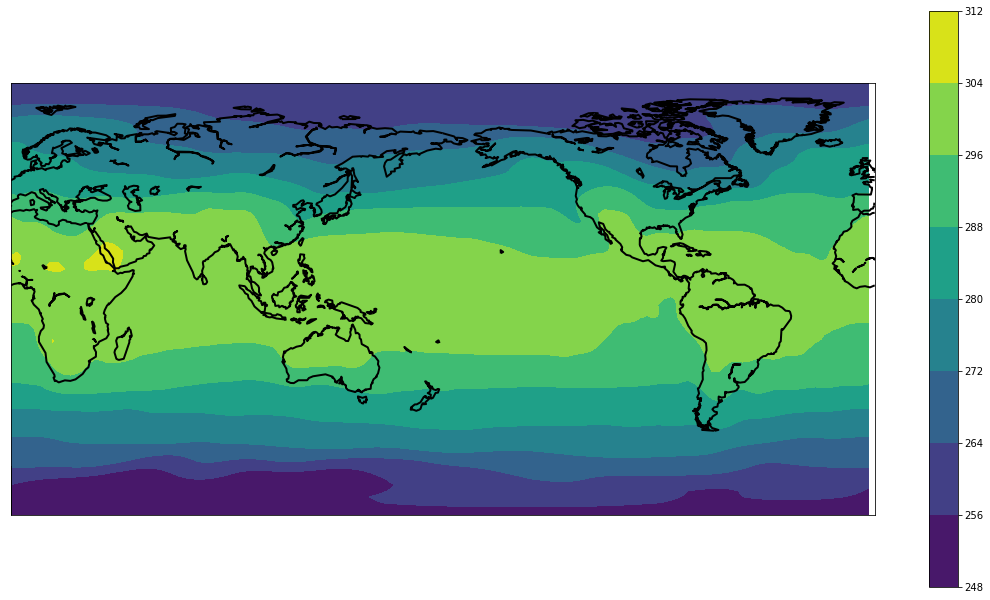

In [6]:
#画图
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0,0,1,1])
mm = Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90)
mm.drawcoastlines(linewidth=2)  #绘制海岸线
#ax1.set_xticks([0,60,120,180,240,300,360])
con1 = mm.contourf(X,Y,air_mean)
fig.colorbar(con1)

## 测试3：设置urcrnrlon=357.5（文件里面的经度最大值），白边消失
注意xticks中最大经度（刻度）的设置

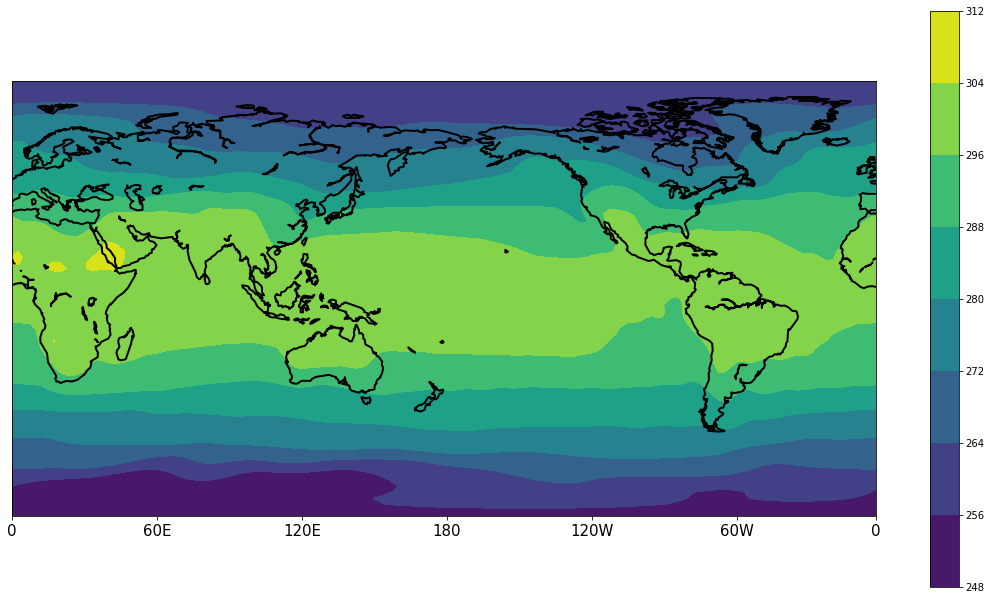

In [7]:
#画图
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_axes([0,0,1,1])
mm = Basemap(llcrnrlon=0,llcrnrlat=-90,urcrnrlon=357.5,urcrnrlat=90)
mm.drawcoastlines(linewidth=2)  #绘制海岸线
ax1.set_xticks([0,60,120,180,240,300,357.5])
ax1.set_xticklabels(['0','60E','120E','180','120W','60W','0'],fontsize=15)
con1 = mm.contourf(X,Y,air_mean)
fig.colorbar(con1)

## 提示：项目中最终展示的图并非完全成品，建议读者自行尝试添加纬度坐标(yticks&yticklabels)、标题(title)、colorbar标题/单位等并进行调整和美化，调整和美化方法可参考【气象科研绘图1-5】